<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Importing-libraries-and-database" data-toc-modified-id="Importing-libraries-and-database-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Importing libraries and database</a></span></li></ul></li><li><span><a href="#Is-there-correlation-between-budget-and-final-rate-score" data-toc-modified-id="Is-there-correlation-between-budget-and-final-rate-score-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Is there correlation between budget and final rate score</a></span></li><li><span><a href="#Genres" data-toc-modified-id="Genres-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Genres</a></span><ul class="toc-item"><li><span><a href="#The-most-frequently-occurring-film-genre-in-USA" data-toc-modified-id="The-most-frequently-occurring-film-genre-in-USA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The most frequently occurring film genre in USA</a></span></li><li><span><a href="#Genre-/-score" data-toc-modified-id="Genre-/-score-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Genre / score</a></span></li></ul></li></ul></div>

database source: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset

## Importing libraries and database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movie_metadata.csv')
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [3]:
movies.shape

(5043, 28)

pd.DataFrame to create a copy, not just a reference
<br>
Play around to realise how cool **reset_index(drop=True)** is

In [4]:
movies_USA = pd.DataFrame(movies[movies['country'] == 'USA'])
movies_USA = movies_USA.reset_index(drop=True)
movies_USA

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
3,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
4,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
5,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
7,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000
8,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0
9,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Action|Adventure|Fantasy,...,1832.0,English,USA,PG-13,225000000.0,2006.0,5000.0,7.3,2.35,5000


In [5]:
movies_USA.shape

(3807, 28)

# Is there correlation between budget and final rate score

In [6]:
movies_USA['budget'] = (movies_USA['budget'] / 1000).round()

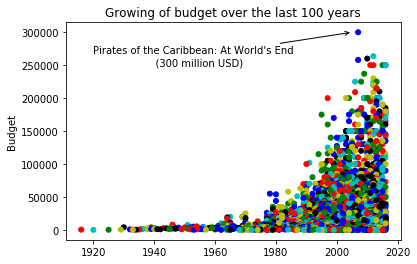

In [7]:
fig, ax = plt.subplots()

plt.scatter(movies_USA['title_year'], movies_USA['budget'], # axises
            c='gbrcyk',  # color. g-green, b-blue, etc
            s=25  # size of spots
           )

ax.annotate("Pirates of the Caribbean: At World's End \n                    (300 million USD)",
            xy=(2005, 300000),
            xytext=(1920, 250000),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.ylabel('Budget')
plt.title('Growing of budget over the last 100 years') 

plt.show()

In [8]:
movies_USA['imdb_score'].mean()

6.367428421329131

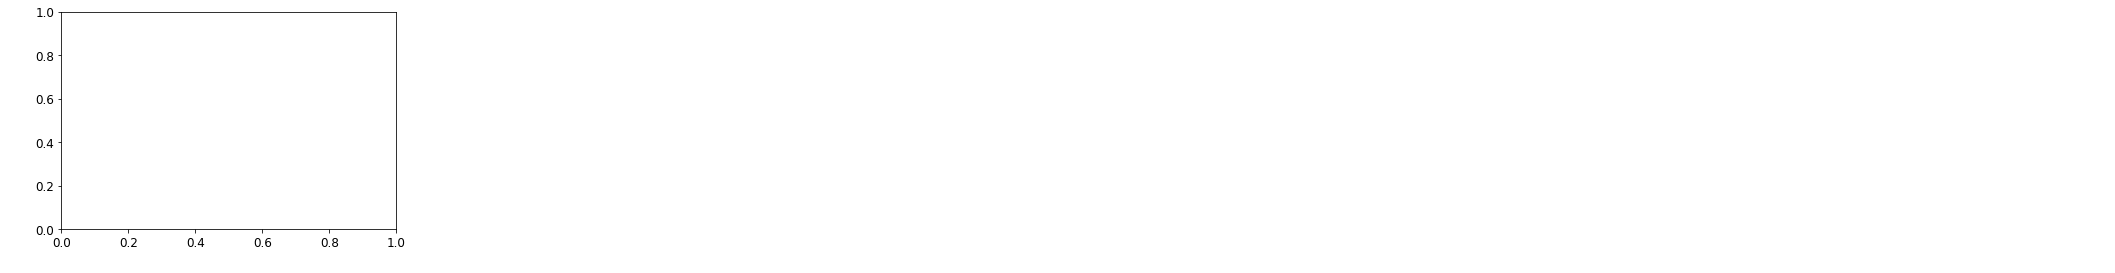

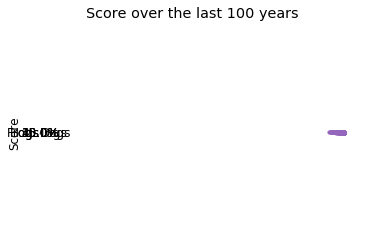

In [35]:
fig, ax = plt.subplots()
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.scatter(movies_USA['title_year'], movies_USA['imdb_score'],
            s=10  # size of spots
           )

ax.annotate("Over the Hill to the Poorhouse \n score: 4.8   users number: 5",
            xy=(1922, 4.6),
            xytext=(1915, 2.5),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.ylabel('Score')
plt.title('Score over the last 100 years') 

plt.show()

In [10]:
average_score = movies_USA[['budget','imdb_score']].groupby('budget', as_index=False).mean()

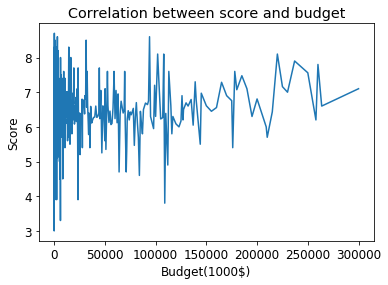

In [36]:
plt.plot(average_score['budget'], average_score['imdb_score'])

plt.xlabel('Budget(1000$)')
plt.ylabel('Score')

plt.title('Correlation between score and budget')

plt.show()

In [12]:
average_score.corr()

,budget,imdb_score
budget,1.000000,0.056297
imdb_score,0.056297,1.000000


What does it mean? No strict correlation between budget and score.
https://medium.com/cinenation-show/2009-movie-correlations-between-ratings-box-office-and-production-budget-2dc68ce7db27

# Genres

## The most frequently occurring film genre in USA

In [13]:
tag_counts = movies_USA['genres'].value_counts()
tag_counts.head()

Comedy                  188
Drama                   167
Comedy|Drama            153
Comedy|Drama|Romance    151
Comedy|Romance          136
Name: genres, dtype: int64

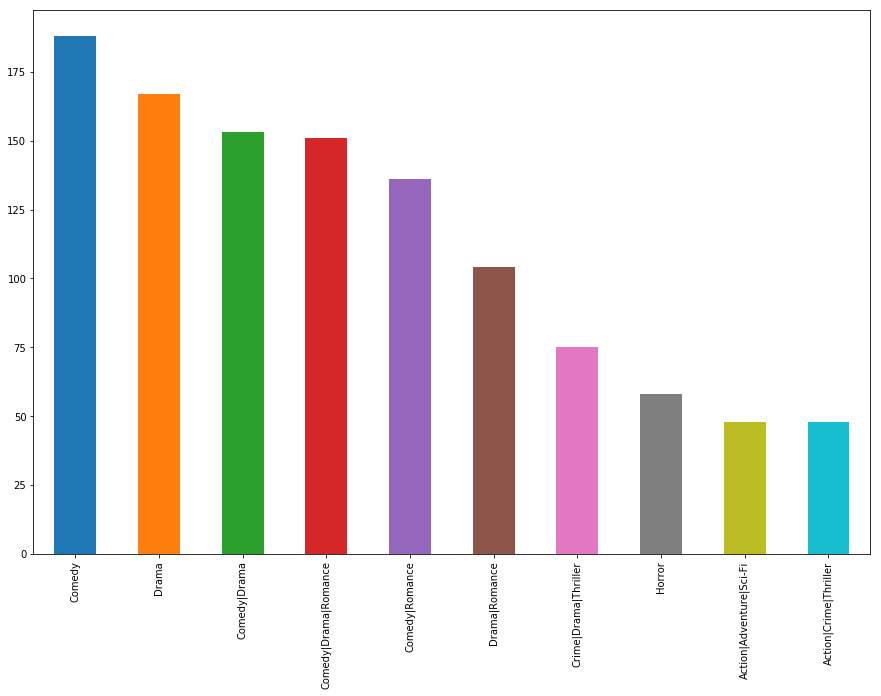

In [14]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

In [15]:
tag_counts_listed = movies_USA['genres'].str.split('|', expand=False)

genries_count = {}

for i in range(len(tag_counts_listed)):
    for k in range(len(tag_counts_listed[i])):
        genries_count.setdefault(tag_counts_listed[i][k], 0)
        genries_count[tag_counts_listed[i][k]] += 1
        
genries_count = pd.Series(genries_count).sort_values(ascending=False)
genries_count

Drama          1852
Comedy         1529
Thriller       1050
Action          861
Romance         839
Adventure       685
Crime           672
Fantasy         487
Sci-Fi          480
Horror          438
Family          436
Mystery         371
Animation       182
Biography       179
Music           173
Sport           151
War             114
Musical         110
History         109
Documentary      90
Western          73
Film-Noir         6
Short             4
News              2
Game-Show         1
Reality-TV        1
dtype: int64

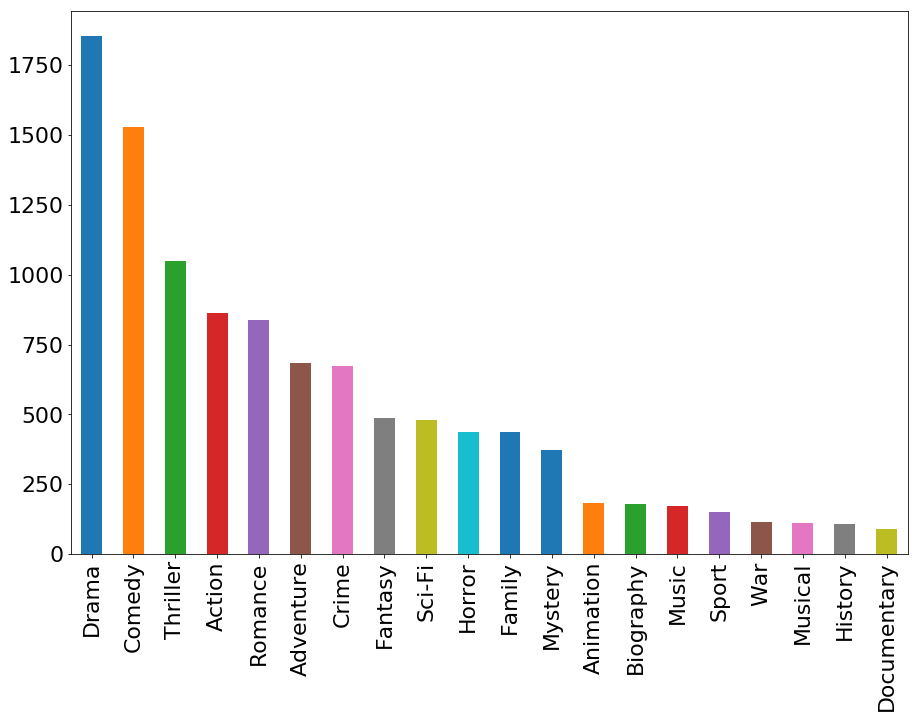

In [16]:
plt.rcParams.update({'font.size': 22})
genries_count[:20].plot(kind='bar', figsize=(15,10))

In [17]:
tag_counts_listed2 = movies_USA['genres'].str.split('|', expand=False)

genries_count2 = {}

for i in range(len(tag_counts_listed2)):
    genries_count2.setdefault(tag_counts_listed2[i][0], 0)
    genries_count2[tag_counts_listed2[i][0]] += 1
        
genries_count2 = pd.Series(genries_count2).sort_values(ascending=False)
genries_count2

Comedy         1099
Action          861
Drama           685
Adventure       329
Crime           259
Horror          189
Biography       158
Documentary      62
Animation        46
Fantasy          42
Mystery          23
Thriller         13
Family           11
Sci-Fi           11
Western           7
Romance           4
Musical           4
Game-Show         1
Film-Noir         1
Music             1
History           1
dtype: int64

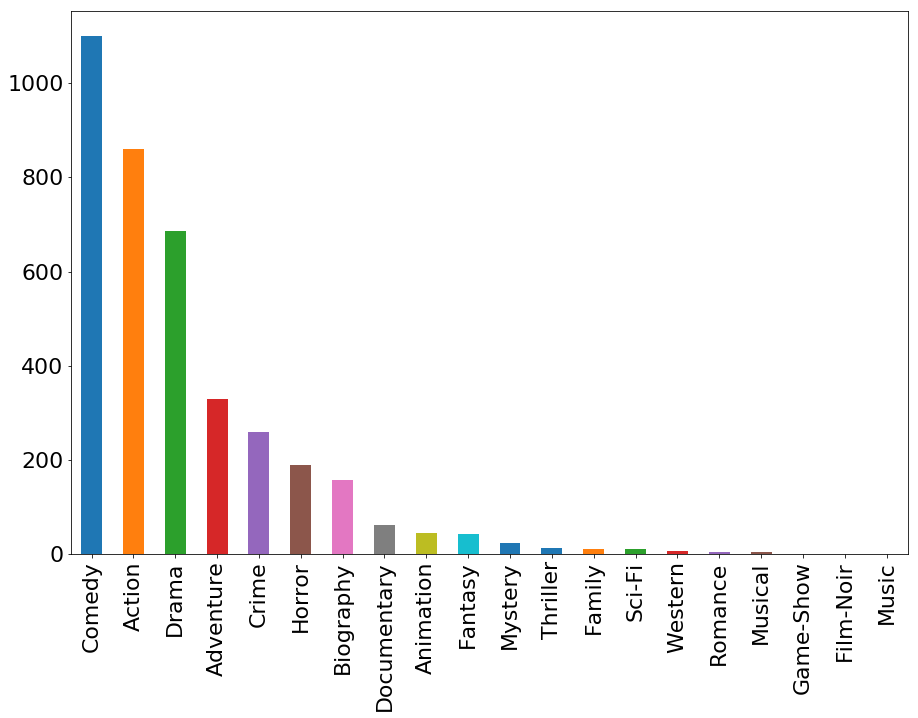

In [18]:
plt.rcParams.update({'font.size': 22})
genries_count2[:20].plot(kind='bar', figsize=(15,10))

If we leave only a primary genre of a particular movie then we see slightly different picture.
<br>
<br>

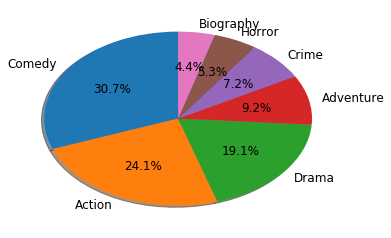

In [19]:
plt.rcParams.update({'font.size': 12})

fig1, ax1 = plt.subplots()
ax1.pie(list(genries_count2.values)[:7], labels=list(genries_count2.index)[:7], autopct='%1.1f%%',
        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Genre / score

In [20]:
tag_counts_listed3 = movies_USA['genres'].str.split('|', expand=False)

genries_count3 = {}
genries_unique = []

for i in range(len(tag_counts_listed3)):
    genries_count3.setdefault(tag_counts_listed3[i][0], [0, 0])

    genries_count3[tag_counts_listed3[i][0]][1] += 1
    genries_count3[tag_counts_listed3[i][0]][0] += movies_USA['imdb_score'][i]
    
    if tag_counts_listed3[i][0] not in genries_unique:
        genries_unique.append(tag_counts_listed3[i][0])

for k in range(len(genries_count3)):
    genries_count3[genries_unique[k]] = genries_count3[genries_unique[k]][0] / genries_count3[genries_unique[k]][1]


genries_count3ser = pd.Series(genries_count3).sort_values(ascending=False)
genries_count3ser

Film-Noir      7.600000
History        7.500000
Music          7.200000
Biography      7.128481
Documentary    7.035484
Crime          6.866023
Drama          6.703066
Mystery        6.682609
Animation      6.619565
Adventure      6.519757
Fantasy        6.328571
Sci-Fi         6.281818
Western        6.257143
Action         6.198606
Comedy         6.119381
Musical        6.000000
Romance        5.900000
Family         5.709091
Horror         5.614286
Thriller       5.200000
Game-Show      2.900000
dtype: float64

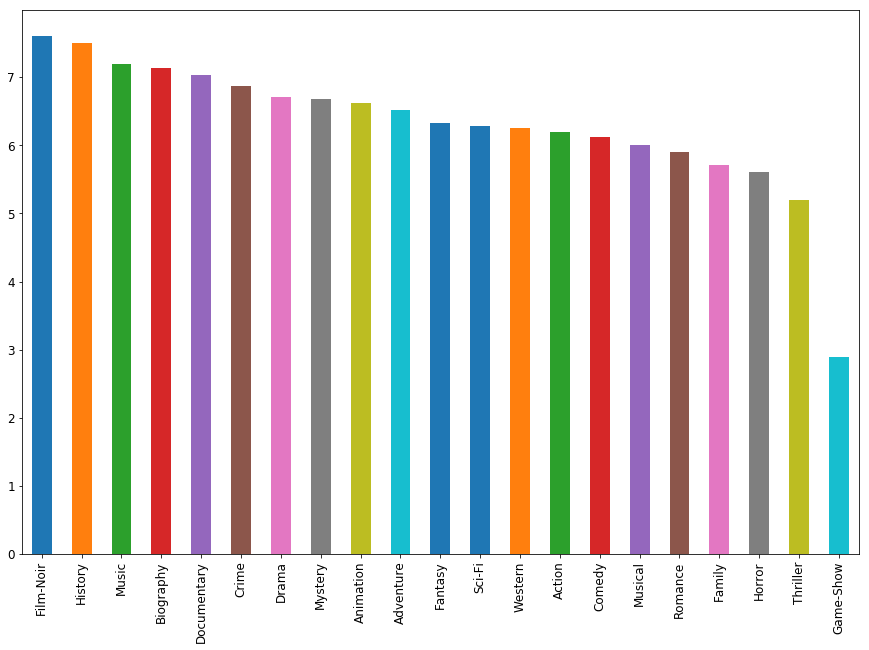

In [21]:
genries_count3ser.plot(kind='bar', figsize=(15,10))

plt.show()

In [22]:
type(list(genries_count2.values))

list

In [23]:
list(genries_count2.values)[:10]

[1099, 861, 685, 329, 259, 189, 158, 62, 46, 42]

In [24]:
genries_count2.values.shape

(21,)

In [25]:
list(genries_count2.index)

['Comedy',
 'Action',
 'Drama',
 'Adventure',
 'Crime',
 'Horror',
 'Biography',
 'Documentary',
 'Animation',
 'Fantasy',
 'Mystery',
 'Thriller',
 'Family',
 'Sci-Fi',
 'Western',
 'Romance',
 'Musical',
 'Game-Show',
 'Film-Noir',
 'Music',
 'History']

In [26]:
genries_count2.index.shape

(21,)